## Example 4.6: Take the numerical derivative of the function $f(t) = \exp(t) \cos(t)$ at $t=0.1$, and following Example 4.5, perform an error assessment. 

For comparison, we can take the analytic derivate first:

$f'(t) = \exp(t) ( \cos(t) - \sin(t) )$

In [11]:
import math
import numpy as np

# Re-define functions to be used in this notebook:
# define a function for the forward-difference derivative.
def dfdt_FD(func, t, h):
    """Calculates the forward-difference derivative of a function func at t, with step size h"""
    return (func(t+h) - func(t))/h

# define a function for the central-difference derivative.
def dfdt_CD(func, t, h):
    """Calculates the central-difference derivative of a function func at t, with step size h"""
    return (func(t+h/2) - func(t-h/2))/h

# define the function to pass to the numerical derivatives:
def ft(t):
    return math.exp(t) * math.cos(t) 

# Let's also define an analytic function that gives us the real result:
def dfdt_analytic(t):
    return math.exp(t) * ( math.cos(t) - math.sin(t) )

# fix the point we are examining: 
t = 0.1

# create the h array: 
harray = np.logspace(-1, -15, num=100,base=10) # the NumPy logspace returns numbers spaced evenly on a log scale.

# get the log10 of h:
log10_h = [math.log10(h) for h in harray]

# Let's use list comprehension!
# cosine: 
log10_rel_error_ft_FD = [math.log10( abs( (dfdt_FD(ft, t, h) - dfdt_analytic(t))/dfdt_analytic(t)) ) for h in harray] # Forward-difference 
log10_rel_error_ft_CD = [math.log10( abs( (dfdt_CD(ft, t, h) - dfdt_analytic(t))/dfdt_analytic(t)) ) for h in harray] # Central-Difference




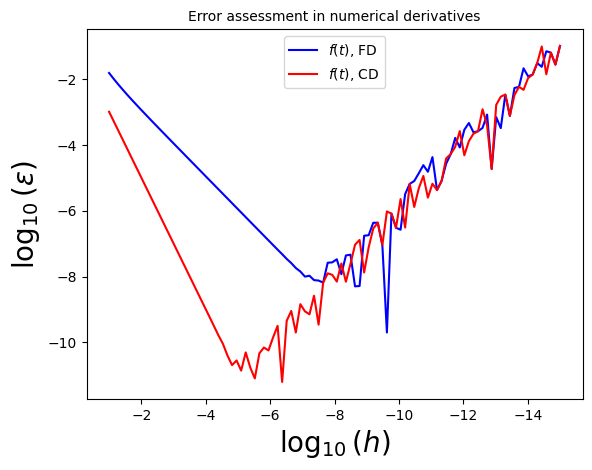

In [13]:
import matplotlib.pyplot as plt # import matplotlib, a conventional module name is plt


# Now plot these! Don't forget the different labels! 
fig, ax = plt.subplots() # create the elements required for matplotlib. This creates a figure containing a single axes.

# set the labels and titles:
ax.set_xlabel(r'$\log_{10}(h)$', fontsize=20) # set the x label
ax.set_ylabel(r'$\log_{10}(\varepsilon)$', fontsize=20) # set the y label. Note that the 'r' is necessary to remove the need for double slashes. You can use LaTeX! 
ax.set_title('Error assessment in numerical derivatives', fontsize=10) # set the title 

# make a one-dimensional plot using the arrays relevant to the cosine:
ax.plot(log10_h, log10_rel_error_ft_FD, label=r'$f(t)$, FD', ls='-', color='blue') 
ax.plot(log10_h, log10_rel_error_ft_CD, label=r'$f(t)$, CD', ls='-', color='red') 

# ivnert the axes to show smaller values of h to the right:
ax.invert_xaxis()

# construct the legend:
ax.legend(loc='upper center')  # Add a legend

plt.show() # show the plot here